In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data and quality checks

In [2]:
df = pd.read_csv('spambase.data', header=None, sep=',')
columns = ['word_freq_make'       ,
'word_freq_address'    ,
'word_freq_all'        ,
'word_freq_3d'         ,
'word_freq_our'        ,
'word_freq_over'       ,
'word_freq_remove'     ,
'word_freq_internet'   ,
'word_freq_order'      ,
'word_freq_mail'       ,
'word_freq_receive'    ,
'word_freq_will'       ,
'word_freq_people'     ,
'word_freq_report'     ,
'word_freq_addresses'  ,
'word_freq_free'       ,
'word_freq_business'   ,
'word_freq_email'      ,
'word_freq_you'        ,
'word_freq_credit'     ,
'word_freq_your'       ,
'word_freq_font'       ,
'word_freq_000'        ,
'word_freq_money'      ,
'word_freq_hp'         ,
'word_freq_hpl'        ,
'word_freq_george'     ,
'word_freq_650'        ,
'word_freq_lab'        ,
'word_freq_labs'       ,
'word_freq_telnet'     ,
'word_freq_857'        ,
'word_freq_data'       ,
'word_freq_415'        ,
'word_freq_85'         ,
'word_freq_technology' ,
'word_freq_1999'       ,
'word_freq_parts'      ,
'word_freq_pm'         ,
'word_freq_direct'     ,
'word_freq_cs'         ,
'word_freq_meeting'    ,
'word_freq_original'   ,
'word_freq_project'    ,
'word_freq_re'         ,
'word_freq_edu'        ,
'word_freq_table'      ,
'word_freq_conference' ,
'char_freq_;'          ,
'char_freq_('          ,
'char_freq_['          ,
'char_freq_!'          ,
'char_freq_$'          ,
'char_freq_#'          ,
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'is_spam']

df.columns = columns

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Explatory Data Analysis

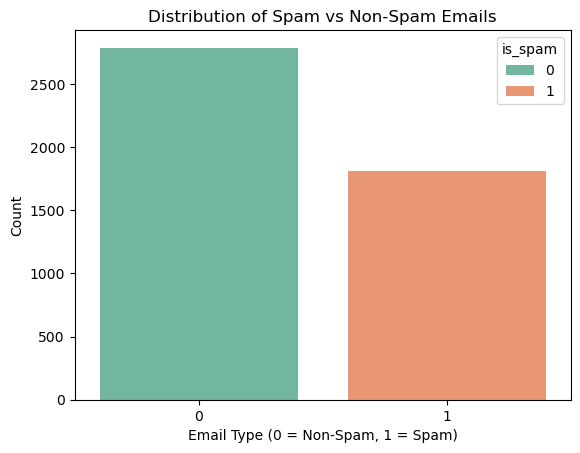

In [7]:
sns.countplot(data=df, x='is_spam', hue='is_spam', palette='Set2')
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()

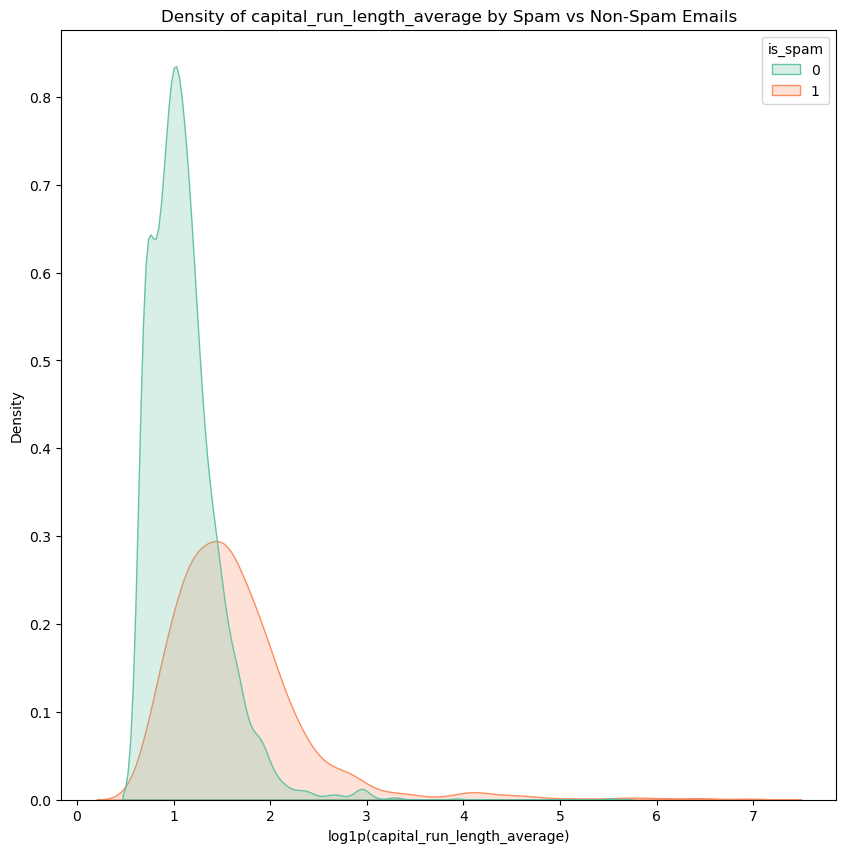

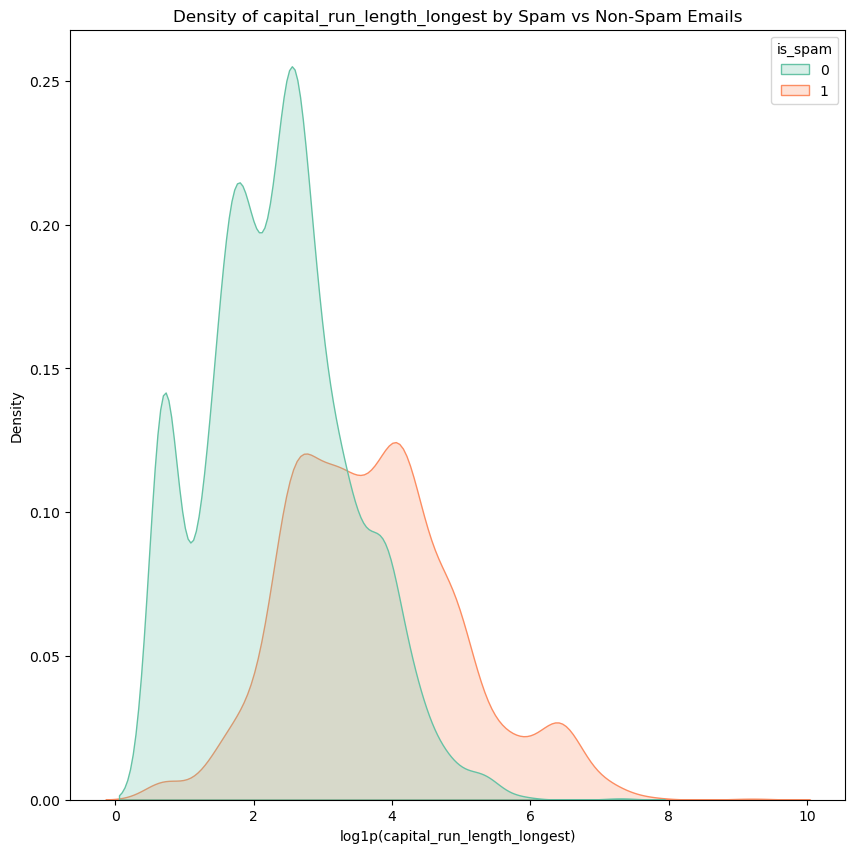

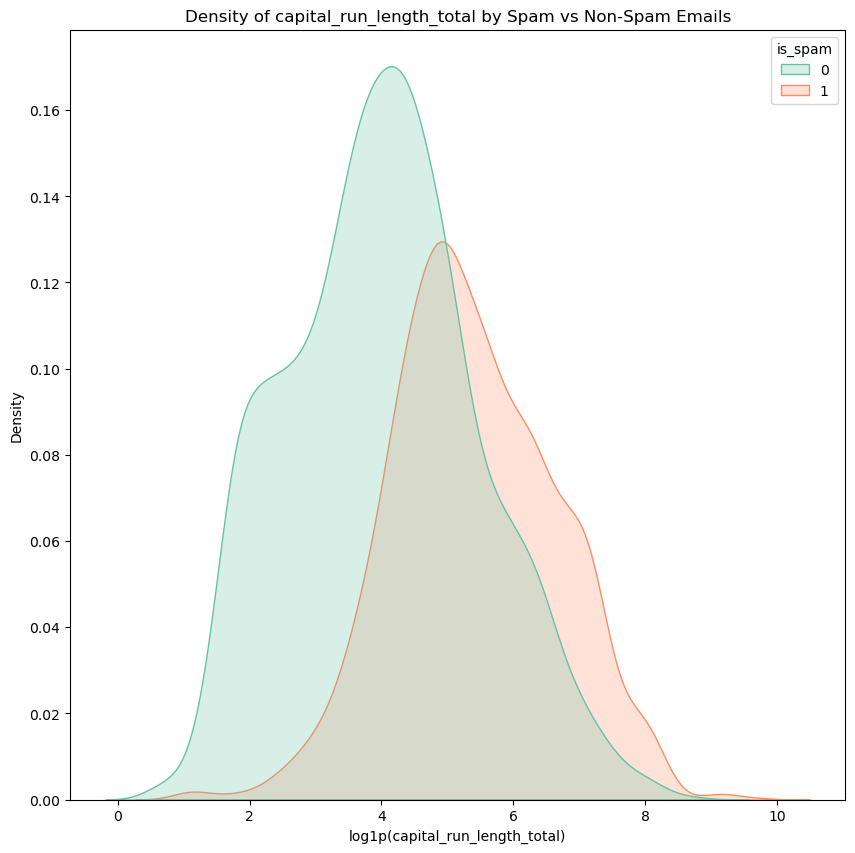

In [8]:
capital_run = ['capital_run_length_average',
               'capital_run_length_longest',
               'capital_run_length_total']

tmp = df[capital_run + ['is_spam']].copy()
for col in capital_run:
    tmp[col] = np.log1p(tmp[col])
    plt.figure(figsize=(10,10))
    sns.kdeplot(data=tmp,x=col,hue='is_spam', palette='Set2', fill=True)
    plt.title(f'Density of {col} by Spam vs Non-Spam Emails')
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Density')
    plt.show()

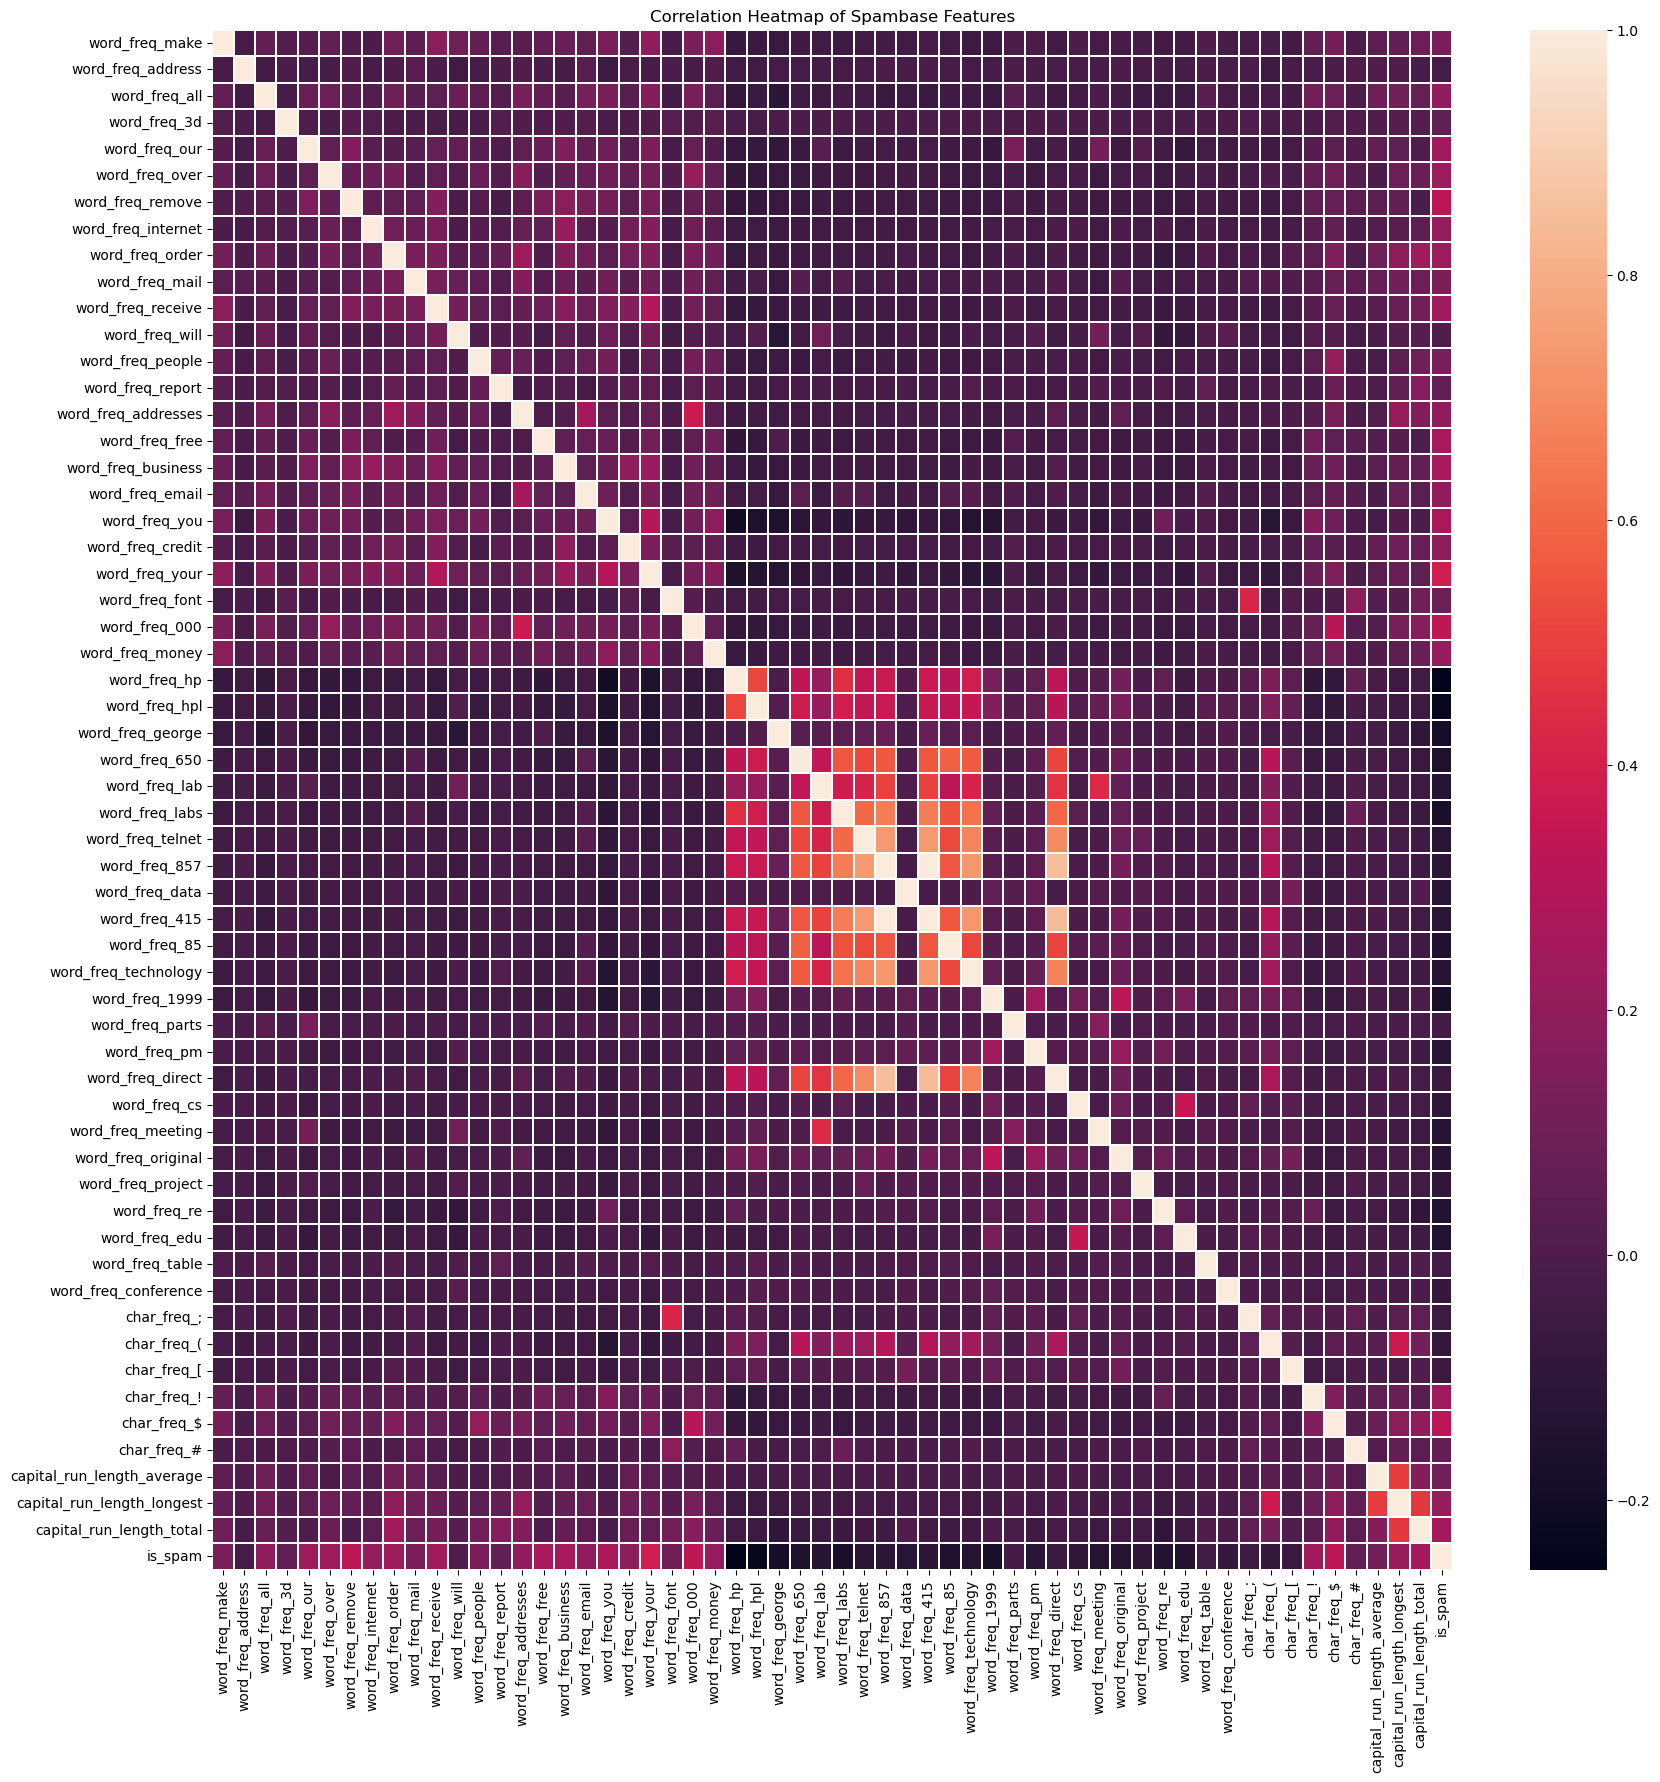

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), linewidths=0.01)
plt.title('Correlation Heatmap of Spambase Features')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


## Train/Test split

In [11]:
X = df.copy().drop(columns='is_spam')
y = df['is_spam'].copy()

In [12]:
X= StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f'Train split: \n{y_train.value_counts()} \nTest split: \n{y_test.value_counts()}')

Train split: 
is_spam
0    2229
1    1451
Name: count, dtype: int64 
Test split: 
is_spam
0    559
1    362
Name: count, dtype: int64


## Models: Logistic Regresssion vs Random Forest

In [13]:
models ={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

feature_names = df.copy().drop(columns='is_spam').columns


### Classification report and Confusion Matrix

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       559
           1       0.93      0.91      0.92       362

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



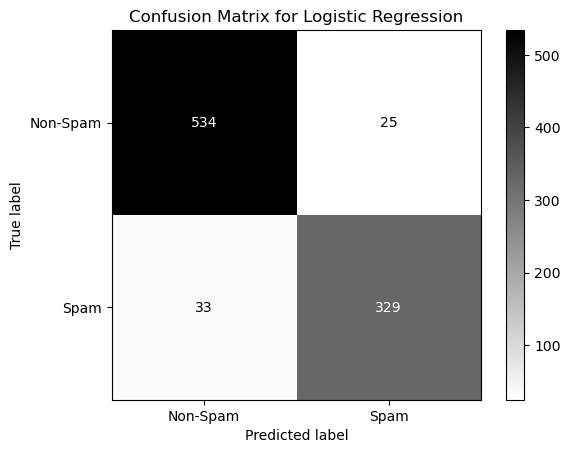

Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       559
           1       0.97      0.94      0.96       362

    accuracy                           0.97       921
   macro avg       0.97      0.96      0.97       921
weighted avg       0.97      0.97      0.97       921



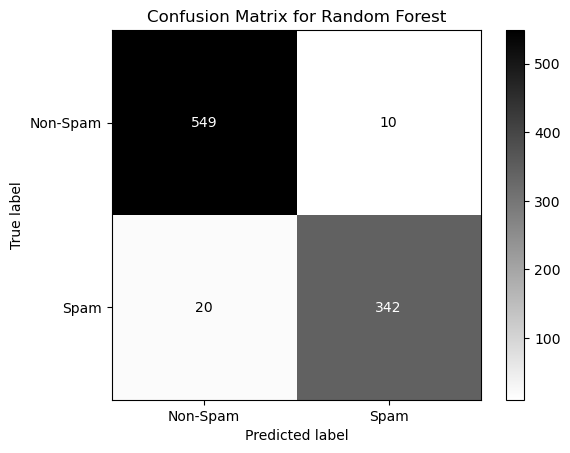

In [14]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Model: {name}')
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'binary', display_labels=['Non-Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


### Top 10 features in the models

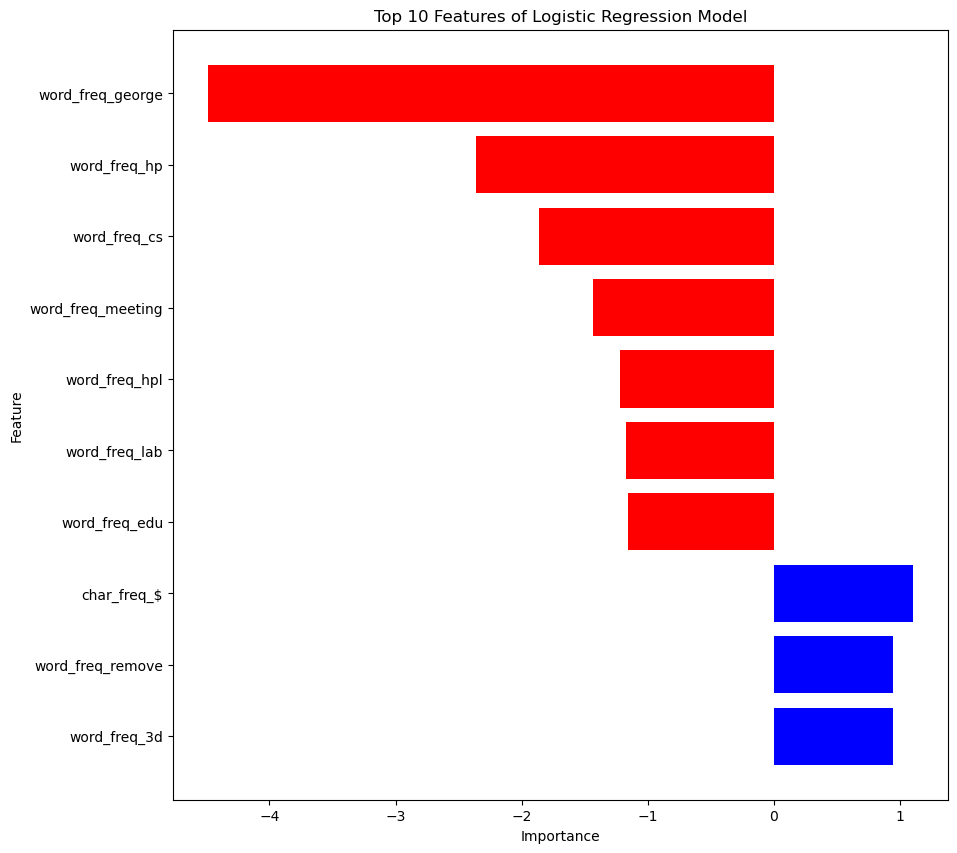

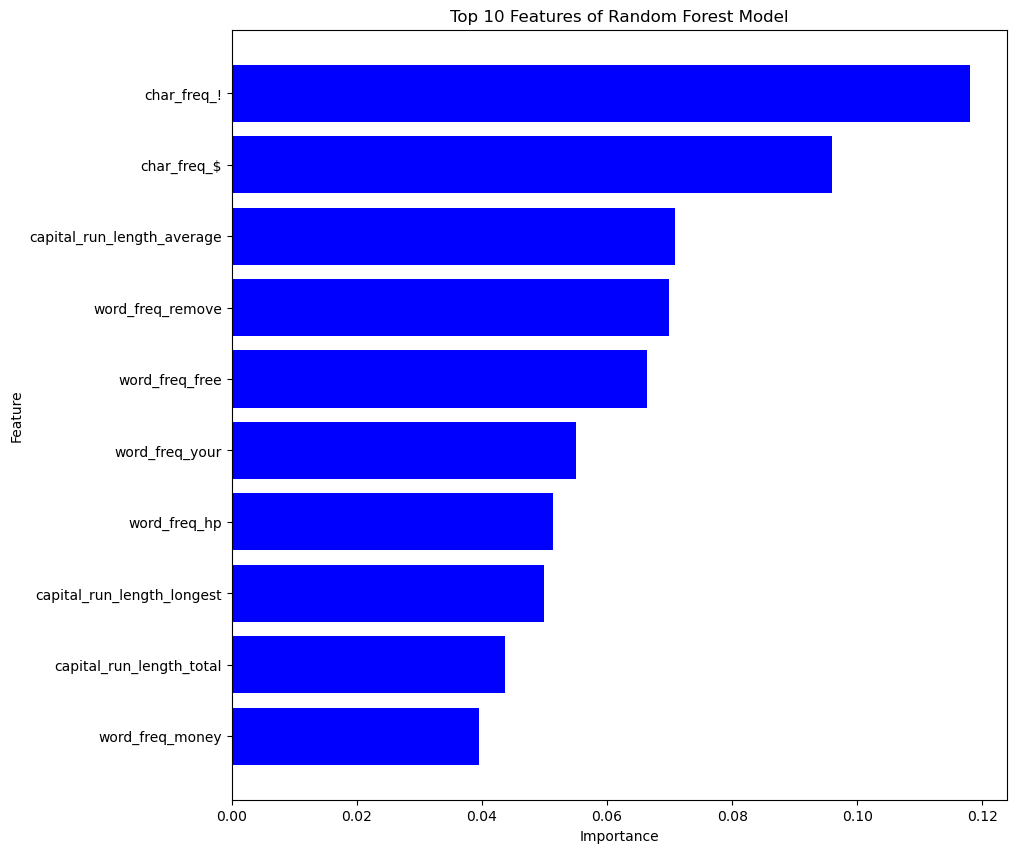

In [15]:
for name, model in models.items():
    plt.figure(figsize=(10,10))
    if name == 'Random Forest':
        importance = model.feature_importances_
        index = np.argsort(importance)[::-1][:10][::-1]

        plt.barh(feature_names[index], importance[index], color='blue')
    else:
        importance = model.coef_.ravel() 
        index = np.argsort(np.abs(importance))[::-1][:10][::-1]

        colors = ['blue' if imp > 0 else 'red' for imp in importance[index]]
        plt.barh(feature_names[index], importance[index], color=colors)

    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.title(f'Top 10 Features of {name} Model')
    plt.show()

### Train/Test accuracy comparision

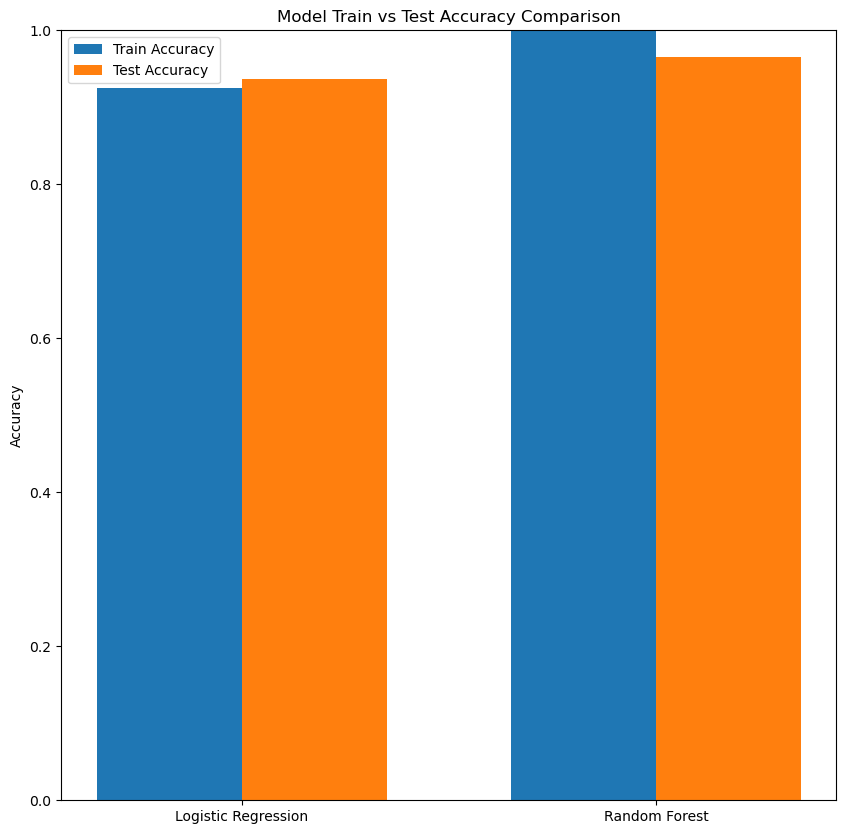

In [16]:
model_names = []
train_scores = []
test_scores = []

for name, model in models.items():
    model_names.append(name)
    model.fit(x_train, y_train)

    cr_train = classification_report(y_train, model.predict(x_train), output_dict=True)
    train_scores.append(cr_train["accuracy"])

    cr_test = classification_report(y_test, model.predict(x_test), output_dict=True)
    test_scores.append(cr_test["accuracy"])

plt.figure(figsize=(10, 10))
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, train_scores, width, label='Train Accuracy')
plt.bar(x + width/2, test_scores, width, label='Test Accuracy')
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Train vs Test Accuracy Comparison")
plt.legend()
plt.show()